#  GISAXS (Grazing-incidence small angle X-ray scattering geometry)

### More details skbeam.core.recip module: gisaxs function.
### (https://github.com/scikit-beam/scikit-beam/blob/master/skbeam/core/recip.py)

In [1]:
import skbeam.core.recip as recip
import skbeam.core.utils as utils

import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

## get the inputs

In [2]:
inc_x0 = 1871   # incident beam x component in pixels
inc_y0 = 339    # incident beam y component in pixels
refl_x0 = 1871   # refelcted beam x component in pixels
refl_y0 = 811    # refelcted beam y component in pixels    
dist_sample = 4.81  # distance to the sample in mm
wavelength = 1.3776 #  wavelength of the X-ray beam in um

dpix = 7.5000004e-02*1000  # pixel size


In [3]:
pixel_size = (dpix, dpix)
incident_beam = (inc_x0, inc_y0)
reflected_beam = (refl_x0, refl_y0)
detector_size = (2167, 2070)

In [4]:
g_output = recip.gisaxs(incident_beam, reflected_beam, pixel_size,
                        detector_size, dist_sample, wavelength,
                        theta_i=0.0)

### Incident Angle

In [5]:
g_output.alpha_i    

0.0036797674392063757

## Tilt Angle

In [6]:
g_output.tilt_angle

0.0

## Create Qzr map

In [7]:
Data = g_output.qr + g_output.qz
x_ticks = []
y_ticks = []
for i in range(0, 2250, 250):
    x_ticks.append(round(Data[0, i], 4))
    y_ticks.append(round(Data[i, 0], 5))
x_ticks, y_ticks    

([0.1089,
  0.0911,
  0.073400000000000007,
  0.055599999999999997,
  0.0378,
  0.0201,
  0.0023,
  -0.0155,
  -0.0149],
 [0.10891000000000001,
  0.12669,
  0.14446999999999999,
  0.16225000000000001,
  0.18002000000000001,
  0.1978,
  0.21557000000000001,
  0.23333000000000001,
  0.25109999999999999])

## Qzr map

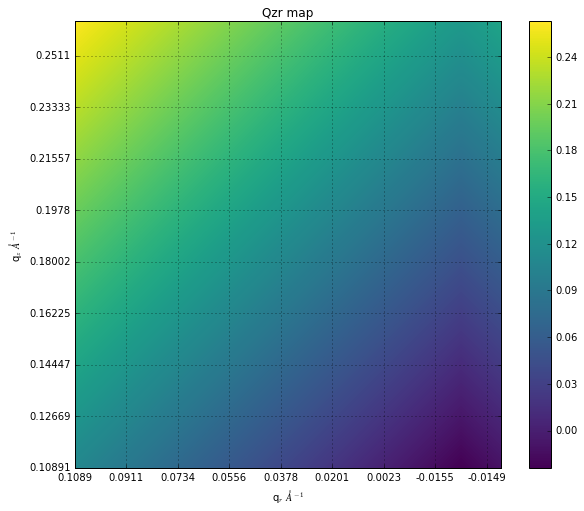

In [8]:
fig, ax = plt.subplots(figsize=(10, 8))
im = ax.imshow(Data, cmap="viridis", origin="lower")
ax.set_title("Qzr map")
ax.set_xlabel('q$_r$ 'r'$\AA^{-1}$')
ax.set_ylabel('q$_z$ 'r'$\AA^{-1}$')
ax.set_xticks(np.arange(0, 2250, 250))
ax.set_xticklabels(x_ticks)
ax.set_yticks(np.arange(0, 2250, 250))
ax.set_yticklabels(y_ticks)
ax.grid()
fig.colorbar(im)
plt.show()

In [9]:
import skbeam
skbeam.__version__

'0.0.7+35.g6ef02ed.dirty'